___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

Does the ``gender`` of a driver have an impact on police behavior during a traffic stop? **In this chapter**, you will explore that question while practicing filtering, grouping, method chaining, Boolean math, string methods, and more!

***

## Examining traffic violations

Before comparing the violations being committed by each gender, you should examine the ``violations`` committed by all drivers to get a baseline understanding of the data.

In this exercise, you'll count the unique values in the ``violation`` column, and then separately express those counts as proportions.

> Before starting your work in this section **repeat the steps which you did in the previos chapter for preparing the data.** Continue to this chapter based on where you were in the end of the previous chapter.

In [1]:
import pandas as pd

ri = pd.read_csv('df-01.csv', index_col=0)

ri.head()

C:\Users\ozlem\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,combined
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,20.0,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-0201:55
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,NaN,NaN,500,M,1987.0,18.0,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-0220:30
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,NaN,NaN,500,M,1986.0,19.0,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-0412:55
2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,NaN,NaN,500,M,1978.0,27.0,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-0601:30
2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,NaN,NaN,0,M,1973.0,32.0,...,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,2005-01-1208:05


**INSTRUCTIONS**

*   Count the unique values in the ``violation`` column, to see what violations are being committed by all drivers.
*   Express the violation counts as proportions of the total.

In [2]:
ri["violation"].unique()

array(['Speeding', 'Equipment', 'Other', 'Moving violation',
       'Registration/plates', 'Seat belt'], dtype=object)

In [3]:
ri["violation"].value_counts()

Speeding               268736
Moving violation        90228
Equipment               61250
Other                   24216
Registration/plates     19830
Seat belt               16324
Name: violation, dtype: int64

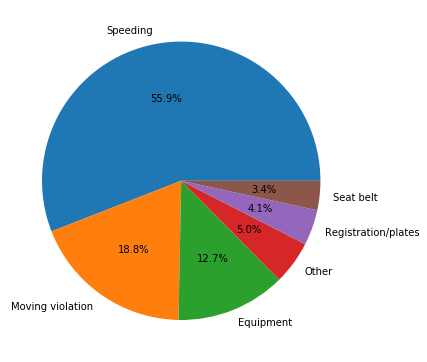

In [4]:
viol_stats = ri['violation'].value_counts()

freq_viol = viol_stats/viol_stats.sum()

import matplotlib.pyplot as plt

labels = freq_viol.index
sizes = list(freq_viol.values)

fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%')

plt.tight_layout()

plt.show()


***

## Comparing violations by gender

The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations.

You'll first create a ``DataFrame`` for each gender, and then analyze the ``violations`` in each ``DataFrame`` separately.

**INSTRUCTIONS**

*   Create a ``DataFrame``, female, that only contains rows in which ``driver_gender`` is ``'F'``.
*   Create a ``DataFrame``, male, that only contains rows in which ``driver_gender`` is ``'M'``.
*   Count the ``violations`` committed by female drivers and express them as proportions.
*   Count the violations committed by male drivers and express them as proportions.

In [5]:
male = ri["driver_gender"] == 'M'
female = ri["driver_gender"] == 'F'

df_male = ri[male]
df_female = ri[female]

viol_male = df_male['violation'].value_counts()
freq_male = viol_male/viol_male.sum()
male_size = freq_male.values
male_label = freq_male.index

viol_female = df_female['violation'].value_counts()
freq_female = viol_female/viol_female.sum()
female_size = freq_female.values
female_label = freq_female.index

df_freq = pd.DataFrame([freq_male, freq_female], index = ['Male', 'Female'])
df_freq * 100


,Speeding,Moving violation,Equipment,Other,Registration/plates,Seat belt
Male,52.236397,20.694757,13.510242,5.844966,4.058138,3.655500
Female,65.730757,13.658131,10.705516,2.890848,4.307676,2.707072


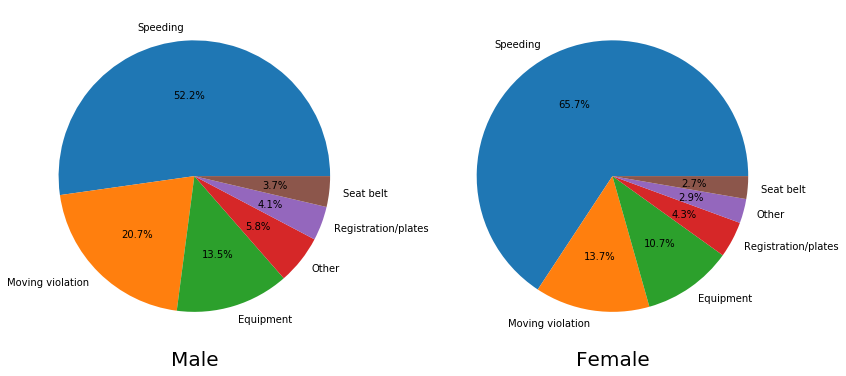

In [6]:
fig, ax = plt.subplots(1,2,figsize=(12, 8))

ax[0].pie(male_size, labels = male_label,autopct='%1.1f%%' )
ax[0].set_xlabel('Male',fontsize = 20)

ax[1].pie(female_size, labels = female_label,autopct='%1.1f%%' )
ax[1].set_xlabel('Female', fontsize = 20)

plt.tight_layout()
plt.show()


***

## Comparing speeding outcomes by gender

When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Can you find evidence of this in the dataset?

First, you'll create two ``DataFrames`` of drivers who were stopped for ``speeding``: one containing ***females*** and the other containing ***males***.

Then, for each **gender**, you'll use the ``stop_outcome`` column to calculate what percentage of stops resulted in a ``"Citation"`` (meaning a ticket) versus a ``"Warning"``.

**INSTRUCTIONS**

*   Create a ``DataFrame``, ``female_and_speeding``, that only includes female drivers who were stopped for speeding.
*   Create a ``DataFrame``, ``male_and_speeding``, that only includes male drivers who were stopped for speeding.
*   Count the **stop outcomes** for the female drivers and express them as proportions.
*   Count the **stop outcomes** for the male drivers and express them as proportions.

In [7]:


df_female_speeding = ri[(ri["driver_gender"] == 'F') & (ri["violation"] == 'Speeding')]
df_male_speeding = ri[(ri["driver_gender"] == 'M') & (ri["violation"] == 'Speeding')]


freq_f_speed = df_female_speeding[(df_female_speeding["stop_outcome"] == "Citation") | \
                                  (df_female_speeding["stop_outcome"] == "Warning") ]["stop_outcome"].value_counts()


freq_m_speed = df_male_speeding[(df_male_speeding["stop_outcome"] == "Citation") | \
                                (df_male_speeding["stop_outcome"] == "Warning") ]["stop_outcome"].value_counts()


In [8]:
print("Female drivers Citation and Warning proportions.")
freq_f_speed / len(df_female_speeding.index) * 100

Female drivers Citation and Warning proportions.


Citation    95.324718
Warning      3.900323
Name: stop_outcome, dtype: float64

In [9]:
print("Male drivers Citation and Warning proportions.")
freq_m_speed / len(df_male_speeding.index) * 100

Male drivers Citation and Warning proportions.


Citation    94.463619
Warning      3.608564
Name: stop_outcome, dtype: float64

***

## Calculating the search rate

During a traffic stop, the police officer sometimes conducts a search of the vehicle. In this exercise, you'll calculate the percentage of all stops that result in a vehicle search, also known as the **search rate**.

**INSTRUCTIONS**

*   Check the data type of ``search_conducted`` to confirm that it's a ``Boolean Series``.
*   Calculate the search rate by counting the ``Series`` values and expressing them as proportions.
*   Calculate the search rate by taking the mean of the ``Series``. (It should match the proportion of ``True`` values calculated above.)

In [10]:
ri['search_conducted'].dtype

dtype('bool')

In [11]:
ri['search_conducted'].value_counts()

False    462822
True      17762
Name: search_conducted, dtype: int64

In [12]:
proportions = ri['search_conducted'].value_counts() / ri['search_conducted'].value_counts().sum()
proportions

False    0.963041
True     0.036959
Name: search_conducted, dtype: float64

In [13]:
ri['search_conducted'].mean() 

0.036959199640437465

***

## Comparing search rates by gender

You'll compare the rates at which **female** and **male** drivers are searched during a traffic stop. Remember that the vehicle search rate across all stops is about **3.8%**.

First, you'll filter the ``DataFrame`` by gender and calculate the search rate for each group separately. Then, you'll perform the same calculation for both genders at once using a ``.groupby()``.

**INSTRUCTIONS 1/3**

*   Filter the ``DataFrame`` to only include **female** drivers, and then calculate the search rate by taking the mean of ``search_conducted``.

In [14]:
df_female = ri[ri["driver_gender"] == 'F']
df_female["search_conducted"].value_counts() / df_female["search_conducted"].value_counts().sum()

False    0.981249
True     0.018751
Name: search_conducted, dtype: float64

**INSTRUCTIONS 2/3**

*   Filter the ``DataFrame`` to only include **male** drivers, and then repeat the search rate calculation.

In [15]:
df_male = ri[ri["driver_gender"] == 'M']
df_male["search_conducted"].value_counts() / df_male["search_conducted"].value_counts().sum()

False    0.956208
True     0.043792
Name: search_conducted, dtype: float64

**INSTRUCTIONS 3/3**

*   Group by driver gender to calculate the search rate for both groups simultaneously. (It should match the previous results.)

In [16]:
byGender = ri.groupby("driver_gender")
byGender["search_conducted"].mean()

driver_gender
F    0.018751
M    0.043792
Name: search_conducted, dtype: float64

***

## Adding a second factor to the analysis

Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.

For example, you might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

You can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, you would find that males and females are searched at about the same rate for each violation. Find out below if that's the case!

**INSTRUCTIONS 1/2**

*   Use a ``.groupby()`` to calculate the search rate for each combination of gender and violation. Are males and females searched at about the same rate for each violation?

In [17]:
ri.groupby(["driver_gender", "violation"])["search_conducted"].mean() * 100

driver_gender  violation          
F              Equipment               4.024503
               Moving violation        3.802133
               Other                   4.589818
               Registration/plates     5.469995
               Seat belt               1.774648
               Speeding                0.773800
M              Equipment               7.091568
               Moving violation        5.915621
               Other                   4.611995
               Registration/plates    10.358931
               Seat belt               3.170503
               Speeding                2.663007
Name: search_conducted, dtype: float64

**INSTRUCTIONS 2/2**

*   Reverse the ordering to group by violation before gender. The results may be easier to compare when presented this way.

In [18]:
ri.groupby(["violation", "driver_gender"])["search_conducted"].mean() * 100

violation            driver_gender
Equipment            F                 4.024503
                     M                 7.091568
Moving violation     F                 3.802133
                     M                 5.915621
Other                F                 4.589818
                     M                 4.611995
Registration/plates  F                 5.469995
                     M                10.358931
Seat belt            F                 1.774648
                     M                 3.170503
Speeding             F                 0.773800
                     M                 2.663007
Name: search_conducted, dtype: float64

***

## Counting protective frisks

During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a ``"protective frisk."``

You'll first check to see how many times "Protective Frisk" was the only search type. Then, you'll use a string method to locate all instances in which the driver was frisked.

**INSTRUCTIONS**

*   Count the ``search_type`` values to see how many times ``"Protective Frisk"`` was the only search type.
*   Create a new column, frisk, that is ``True`` if ``search_type`` contains the string ``"Protective Frisk"`` and ``False`` otherwise.
*   Check the data type of frisk to confirm that it's a ``Boolean Series``.
*   Take the sum of frisk to count the total number of frisks.

In [19]:
ri['search_type'].value_counts()

Incident to Arrest                                          6998
Probable Cause                                              4989
Reasonable Suspicion                                        1141
Inventory                                                   1101
Protective Frisk                                             879
Incident to Arrest,Inventory                                 649
Incident to Arrest,Probable Cause                            552
Probable Cause,Reasonable Suspicion                          334
Probable Cause,Protective Frisk                              221
Incident to Arrest,Protective Frisk                          158
Incident to Arrest,Inventory,Probable Cause                  151
Inventory,Probable Cause                                     132
Protective Frisk,Reasonable Suspicion                         83
Incident to Arrest,Inventory,Protective Frisk                 77
Incident to Arrest,Probable Cause,Protective Frisk            74
Inventory,Protective Fris

In [20]:
ri["frisk"] = ri["search_type"] == "Protective Frisk"

ri["frisk"].dtype


dtype('bool')

In [21]:
ri["frisk"].sum()

879

***

## Comparing frisk rates by gender

You'll compare the rates at which female and male drivers are frisked during a search. Are males frisked more often than females, perhaps because police officers consider them to be higher risk?

Before doing any calculations, it's important to filter the ``DataFrame`` to only include the relevant subset of data, namely stops in which a search was conducted.

**INSTRUCTIONS**

*   Create a ``DataFrame``, searched, that only contains rows in which ``search_conducted`` is ``True``.
*   Take the mean of the frisk column to find out what percentage of searches included a frisk.
*   Calculate the frisk rate for each gender using a ``.groupby()``.

In [22]:
df_frisk = ri[ri["search_conducted"] == True]
df_frisk["frisk"].mean()

0.04948767030739781

In [23]:
df_frisk.groupby("driver_gender")["frisk"].mean() * 100

driver_gender
F    4.229362
M    5.064366
Name: frisk, dtype: float64

In [24]:
ri.to_csv('df-02.csv')